In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import myLib
import copy
from scipy import integrate

In [2]:
# Extra needed functions
################################

def boundary(A):
    """
    Sets up the boundary conditions

    Input:
     - A: Matrix to set boundaries on
     - x: Array where x[i] = hx*i, x[last_element] = Lx

    Output:
     - A is initialized in-place (when this method returns)
    """

    #Boundaries implemented (condensator with plates at y={0,Lx}, DeltaV = 200):
    # A(x,0)  =  1
    # A(x,Ly) = 0
    # A(0,y)  = 0
    # A(Lx,y) = 0

    Nx = A.shape[1]
    Ny = A.shape[0]


    A[Ny-1,:] = 1.0
    A[0,:]    = 0.0
    A[:,0]    =   0
    A[:,Nx-1] = 0
    
    return A

a = np.e/(np.e-1)   #Global parameter needed to define below two functions
def y(x):
    return -np.log(1-x/a)   # This one corresponds to p(y) = ae^(-y)

def p(y):
    return a*(np.exp(-y))

In [3]:
#Q1
def f(x):
    return np.exp(-x*x)

N = 200   # No of random xs
# No importance Sampling
int1 = myLib.monteCarloIntegral(f,0,1,N)

# With importance sampling
int2 = myLib.monteCarloIntegralImportanceSampling(f,p,y,0,1,N)

print("Value of integral without importance sampling =",int1)
print()
print("Value of integral with importance sampling =",int2)

Value of integral without importance sampling = 0.7645161647372897

Value of integral with importance sampling = 0.7457194846192754


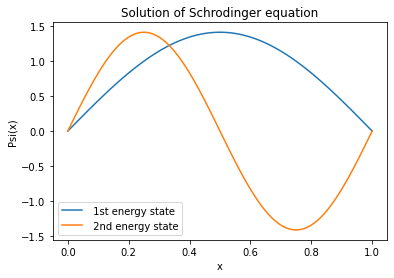

In [4]:
#Q2
#normalising function
def normalize(x,y):
    # Creating array mod square of psi
    ymod = [abs(yval)**2 for yval in y]

    # Integrating the arrays
    norm = integrate.simps(ymod,x)
    if norm == 1: 
       return y
    return y / np.sqrt(norm)

# Energies for first 2 energy states
E1 = np.pi**2
E2 = 4*np.pi**2

# Coupled DE for first 2 energy states
def dz1_dx(x = 0,y = 0,z = 0): return -E1*y
def dz2_dx(x = 0,y = 0,z = 0): return -E2*y
def dy_dx(x = 0,y = 0,z = 0): return z

#Solving coupled Differential equation
xl1,yl1,zl1 = myLib.coupled_RK4(dz1_dx,dy_dx,(0,1),(0,0,1))
yl1 = normalize(xl1,yl1)
xl2,yl2,zl2 = myLib.coupled_RK4(dz2_dx,dy_dx,(0,1),(0,0,1))
yl2 = normalize(xl2,yl2)

# Plotting the wavefunctions
plt.plot(xl1,yl1, label = " 1st energy state")
plt.plot(xl2,yl2, label = " 2nd energy state")
plt.ylabel("Psi(x)")
plt.xlabel("x")
plt.title("Solution of Schrodinger equation")
plt.legend()
plt.savefig("Schrodinger.png")
plt.show()

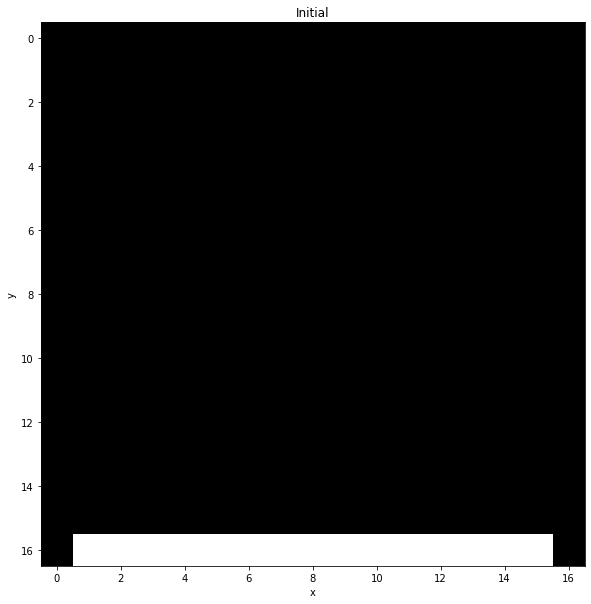

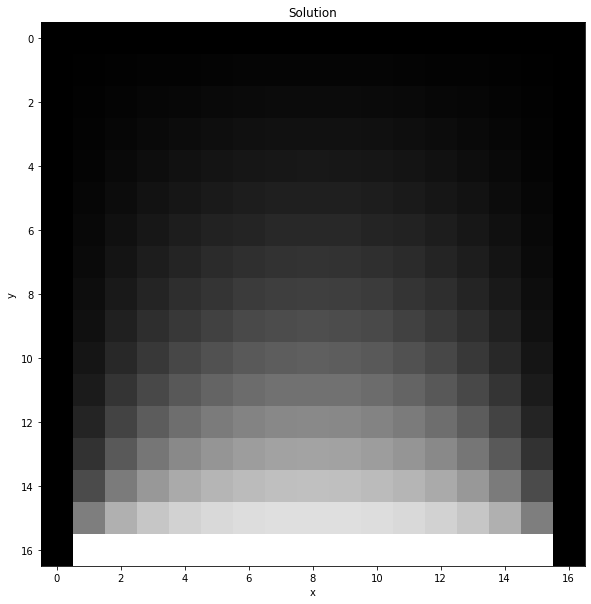

In [5]:
#Q3

# Input parameters
N = 15
N1 = N+2
maxiter = 1000

A = np.zeros((N+2,N+2))

A = boundary(A)  #Function defined at top

B = copy.deepcopy(A)

#solving for laplace equation
sol = myLib.Laplace2D(A,maxiter,0.00001)

#Initially
plt.figure(figsize = (10,10))
im = plt.imshow(B, cmap = 'gray')

plt.title('Initial')
plt.xlabel("x")
plt.ylabel("y")

# Final solution
plt.figure(figsize = (10,10))
im = plt.imshow(A, cmap = 'gray')

plt.title('Solution')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("Laplace")